In [537]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

In [544]:
PATH =   r"/home/swastik/workspace/repo/PyResearch/training/"
PATHTest =   r"/home/swastik/workspace/repo/PyResearch/testing/"
df = pd.read_csv(PATHTest+"part-067.csv")
dfTest = pd.read_csv(PATHTest+"part-001.csv")

rawdata = pd.read_csv(PATHTest+"part-067.csv")
splitData = train_test_split(rawdata, test_size= 0.3)

train = splitData[0]
test = splitData[1]

np.shape(test)

(12076, 235)

In [487]:
df.isAnomaly.value_counts()

False    40231
True        21
Name: isAnomaly, dtype: int64

In [488]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(df.drop(["host", "process", "timestamp", "isAnomaly"], axis="columns"))
X_test = sc.transform(dfTest.drop(["host", "process", "timestamp", "isAnomaly"], axis="columns"))

In [489]:
pca = PCA(10)

In [490]:

df['label'] = np.where(df['isAnomaly'] == "true", 1, 0)
dfTest['label'] = np.where(dfTest['isAnomaly'] == "true", 1, 0)

pca.fit(X_train)

/home/swastik/.local/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


PCA(n_components=10)

In [491]:
X_pc = pca.transform(X_train)
test_img = pca.transform(X_test)

In [492]:
n_pcs= pca.components_.shape[0]

most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = df.drop(["host", "process", "isAnomaly", "timestamp"], axis='columns').columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
dfX = pd.DataFrame(sorted(dic.items()))


In [493]:
dfX.head

<bound method NDFrame.head of       0                                                  1
0   PC1  Connection delay : (MXBean(com.bea:Name=source...
1  PC10  Heap usage activity : (d/dx (MXBean(java.lang:...
2   PC2  Process CPU : (MXBean(java.lang:type=Operating...
3   PC3  Rel. nonHeap usage : ((MXBean(java.lang:type=M...
4   PC4  Reserve request activity : (incld/dx (MXBean(c...
5   PC5  Active connections : (MXBean(com.bea:Name=sour...
6   PC6  Reserve request activity : (incld/dx (MXBean(c...
7   PC7  NonHeap usage activity : (d/dx (MXBean(java.la...
8   PC8  Connection delay : (MXBean(com.bea:Name=source...
9   PC9  Available db connection activity : (d/dx (MXBe...>

In [494]:
training=df[most_important_names + ['isAnomaly', 'timestamp']]
test = dfTest[most_important_names + ['isAnomaly', 'timestamp']]

In [495]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)

clf = IsolationForest(max_samples='auto', n_estimators=100, 
                      random_state=rng,
                      max_features=1.0,
                      #behaviour="new",
                      contamination="auto")

clf.fit(training[most_important_names])
y_pred_train = clf.predict(test[most_important_names])
display(y_pred_train)

unique, counts = np.unique(y_pred_train, return_counts=True)
predictions = dict(zip(unique, counts))

predictions

array([ 1,  1,  1, ..., -1, -1, -1])

{-1: 1033, 1: 35255}

In [496]:
dfTest.isAnomaly.value_counts()

False    36288
Name: isAnomaly, dtype: int64

In [497]:
print("Accuracy:", list(y_pred_train).count(1)/y_pred_train.shape[0])

Accuracy: 0.9715332892416225


In [498]:
dfTest.loc[dfTest['isAnomaly'] == 'true', 'expected'] = int(-1)  
dfTest.loc[dfTest['isAnomaly'] != 'true', 'expected'] = int(1)  

/home/swastik/.local/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [499]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred_train, dfTest['expected'])

0.05693342151675485

In [500]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_train,  dfTest['expected'])# Accuracy

array([[    0,  1033],
       [    0, 35255]])

In [501]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_train,  dfTest['expected'])# Recall

0.9715332892416225

In [502]:
from sklearn.metrics import recall_score
recall_score(y_pred_train,  dfTest['expected'], average=None)# Precision

array([0., 1.])

In [503]:
from sklearn.metrics import precision_score
precision_score(y_pred_train,  dfTest['expected'], average=None)

/home/swastik/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.97153329])

In [504]:
#dfTest['predicted'] = y_pred_train

In [505]:
pca_d2 = PCA(2)
x_fit = sc.fit_transform(dfTest.drop(["host", "process", "timestamp", "isAnomaly"], axis="columns"))
X_trans = sc.transform(dfTest.drop(["host", "process", "timestamp", "isAnomaly"], axis="columns"))

In [506]:
pca_d2.fit(X_trans)

PCA(n_components=2)

In [507]:
toPlot = pca_d2.transform(X_trans)

In [508]:
outliers = toPlot[np.where(y_pred_train==-1)]
normals = toPlot[np.where(y_pred_train==1)]

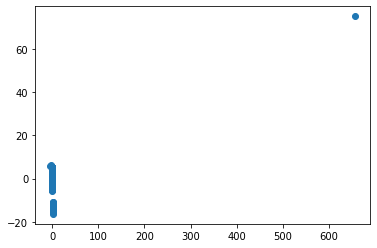

In [509]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.scatter(otulierIndx[:,0], otulierIndx[:,1])
#ax1.scatter(normalIndx[:,0], normalIndx[:,1])
ax1.scatter(outliers[:,0], outliers[:,1])

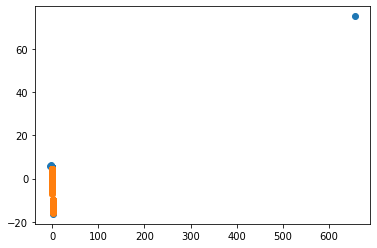

In [529]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.scatter(otulierIndx[:,0], otulierIndx[:,1])
ax1.scatter(outliers[:,0], outliers[:,1])
ax1.scatter(normals[:,0], normals[:,1])

In [514]:
anomaly = df[df['isAnomaly']==True]
norm = df[df['isAnomaly']==False]

In [516]:
a = pca_d2.fit_transform(anomaly[most_important_names])
n = pca_d2.fit_transform(norm[most_important_names])

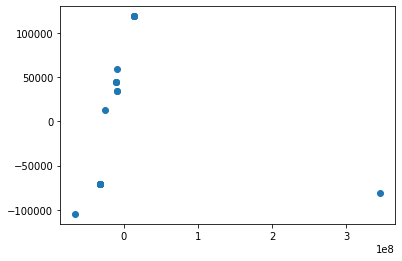

In [527]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.scatter(otulierIndx[:,0], otulierIndx[:,1])
#ax1.scatter(n[:,0], n[:,1])
ax1.scatter(a[:,0], a[:,1])

In [536]:
df['isAnomaly']==True

0        False
1        False
2        False
3        False
4        False
         ...  
40247    False
40248    False
40249    False
40250    False
40251    False
Name: isAnomaly, Length: 40252, dtype: bool